In [1]:
from src import setup
from src import common
from src import host
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# This prevents to restart the kernel whenever an external file is edited
%load_ext autoreload
%autoreload 2

# Introduction

At this point, we expect to have **clean** viral and host data (filtered for missingness, rare variants, hardy-weinberg equilibrium). We also assume that there is a file containing all the individuals (IGM ids) that are in all the datasets (we will use this together with `--keep-fam` command of plink).

We will first filter out the individuals that are missing in any of the three datasets (viral sequencing data, host sequencing data, clinical data) by using a custom function `common.find_individuals`. Then we will run some PCAs and association tests (univariate and multivariate models, i.e. corrected for sex, age, population stratification, ...). Eventually, we'll focus on asian individuals.

# Principal component analysis

## plink PCA computation

We use the `--keep-fam <file>` command to keep individuals that are in all datasets. 

In [4]:
host.run_plink("--pca --keep-fam " + setup.PATH_INTERSECTING_INDIVIDUALS,
                file=setup.PATH_HOST_CLEAN_DATA, out=setup.PATH_HOST_CLEAN_DATA,
                extension='eigenvec', log_name='host_pca');

Running 'plink2 --bfile data/plink/host_geno_clean --out data/plink/host_geno_clean --pca --keep-fam data/intersecting_ids '
Log written to 'data/plink/log/host_pca.log'


## Load into DataFrame



                PC1       PC2 GT
IID                             
igm160019 -0.023284 -0.000617  C
igm160020 -0.025024 -0.003558  B
igm160022 -0.027956  0.001514  B
igm160023 -0.025841  0.002978  C
igm160024 -0.026401 -0.004948  C
...             ...       ... ..
igm160902 -0.012623  0.004232  C
igm160903 -0.025766 -0.006075  C
igm160904 -0.024152 -0.002704  C
igm160905 -0.027098 -0.002022  C
igm160906 -0.026651 -0.000946  C

[610 rows x 3 columns]


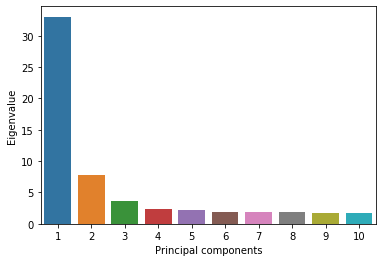

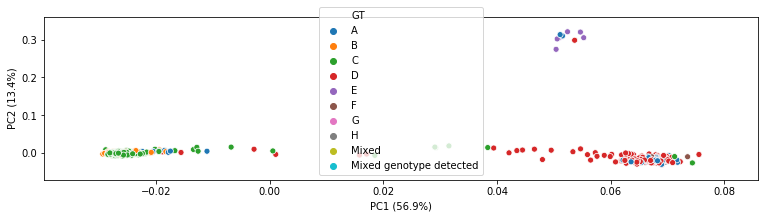

In [25]:
host.plot_plink_pca(setup.PATH_HOST_CLEAN_DATA, n_pcs=2, hue_col='GT')